In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
import re
from scrapy.crawler import CrawlerProcess

class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "ESS"
    
    # URL(s) to start with.
    start_urls = [
        'https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=30.26&lon=-97.73&maxDistance=40&minDiff=5.6&maxResults=500&maxDiff=5.15&key=200200829-a8cc557964faf9b1652fd5f3ad28b8a9',
    ]
    
    def parse(self, response):
        with open('mountainproject.json', 'wb') as f:
            f.write(response.body)


# The new settings have to do with scraping etiquette.          
process = CrawlerProcess()

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()
print('Success!')

2019-11-12 13:05:44 [scrapy.utils.log] INFO: Scrapy 1.8.0 started (bot: scrapybot)
2019-11-12 13:05:44 [scrapy.utils.log] INFO: Versions: lxml 4.3.2.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.7.0, Python 3.7.3 (default, Mar 27 2019, 16:54:48) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.6.1, Platform Darwin-18.2.0-x86_64-i386-64bit
2019-11-12 13:05:44 [scrapy.crawler] INFO: Overridden settings: {}
2019-11-12 13:05:44 [scrapy.extensions.telnet] INFO: Telnet Password: 0c583a639c790708
2019-11-12 13:05:44 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2019-11-12 13:05:44 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.D

Success!


In [1]:
import pandas as pd

mp_df=pd.read_json('mountainproject.json')

In [27]:
mp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
routes       500 non-null object
success      500 non-null int64
name         500 non-null object
type         500 non-null object
rating       500 non-null object
starVotes    500 non-null int64
longitude    500 non-null float64
latitude     500 non-null float64
stars        500 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.2+ KB


In [34]:
print(mp_df['stars'].describe())

print('\n', mp_df['starVotes'].describe())

count    500.000000
mean       3.332000
std        0.618499
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64

 count    500.000000
mean      16.212000
std       19.451987
min        1.000000
25%        3.000000
50%        9.000000
75%       23.000000
max      175.000000
Name: starVotes, dtype: float64


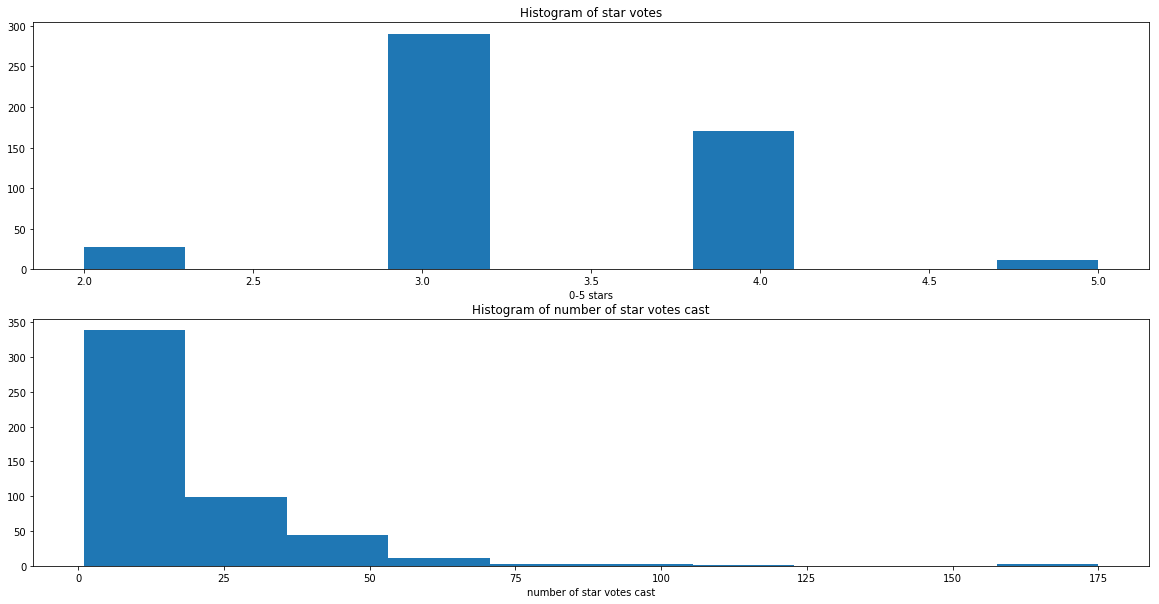

In [37]:
#plotting some data in histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.hist(mp_df.stars)
plt.title("Histogram of {}".format("star votes"))
plt.xlabel('0-5 stars')

plt.subplot(2,1,2)
plt.hist(mp_df.starVotes)
plt.title("Histogram of {}".format("number of star votes cast"))
plt.xlabel('number of star votes cast')

plt.show()

In [24]:
mp_df['name'] = None
mp_df['type'] = None
mp_df['rating'] = None
mp_df['stars'] = 0
mp_df['starVotes'] = 0
mp_df['longitude'] = 0.0
mp_df['latitude'] = 0.0

In [26]:
count_n = 0

for dict_val in mp_df['routes']:
    mp_df['name'][count_n] = dict_val['name']
    mp_df['type'][count_n] = dict_val['type']
    mp_df['rating'][count_n] = dict_val['rating']
    mp_df['stars'][count_n] = dict_val['stars']
    mp_df['starVotes'][count_n] = dict_val['starVotes']
    mp_df['longitude'][count_n] = dict_val['longitude']
    mp_df['latitude'][count_n] = dict_val['latitude']
    count_n += 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set 